## 섹션 2 프로젝트 개요  

목적
- 직접 선택한 데이터셋을 사용해서 만든 머신러닝 예측 모델을 통한 성능 및 인사이트를 도출/공유


# Part 1
1. 데이터 셋 선정
2. 문제 정의
3. EDA & 전처리


In [1]:
!pip install category_encoders==2.*
!pip install eli5
!pip install pandas-profiling==2.*
!pip install pdpbox
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 3.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 3.7 MB/s 
     |████████████████████████████████| 133 kB 36.8 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=b9f51c296d94246dd14869b2393e5716557a705d8a04d596eece200d52c82f84
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 5.2 MB/s 


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [340]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [341]:
### [1]: 데이터 셋 선정
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project2dataset/netflix.csv')

In [342]:
df = data.copy()

## [2]: 문제 정의  
    
- OTT 플랫폼이 다양해지면서 넷플릭스가 지속가능한 경쟁력을 가지기 위해 다른 플랫폼과의 차별점이 중요한 상황이다.  
- 넷플릭스는 많은 컨텐츠를 제공하는 강점이 있지만, 이는 소비자들이 컨텐츠를 선택하기 어려워하는 결과도 낳았다.  
- 넷플릭스의 추천 시스템을 강화해야 한다.  
- 최신 인기 컨텐츠 추천, 소비자별 추천, 장르별 추천, 등 다양한 추천 시스템이 존재하지만, 추가로 '숨은 명작' 추천 시스템을 도입하여 타 프랫폼과 차별성을 둘 수 있다. 
- '숨은 명작' 추천 시스템으로 소비되는 컨텐츠의 다양성을 개선할 수 있다.
- 또한 '숨은 명작' 예측 모델을 기반으로 넷플릭스에 양질의 컨텐츠를 도입/제공할 수 있다.  

### **칼럼 설명**
- '**Title**': Title of the contents
- '**Genre**': 100s of genres
- '**Tags**': 1000s of detailed tags
- '**Languages**': English and more
- '**Series_or_Movie**': TV Series or Movie
- '**Hidden_Gem_Score**': Low review count & high rating
- '**Country_Availability**': Netflix country availability
- '**Runtime**': How long the series or movie is
- '**Director**': Director of content
- '**Writer**': Writer of content
- '**Actors**': Actors appearing in content
- '**View_Rating**': Motion Picture Association film rating system
- '**IMDb_Score**': Score from IMDb (영화, 배우, 텔레비전 드라마, 비디오 게임 등에 관한 정보를 제공)
- '**Rotten_Tomatoes_Score**': Score from Rotten Tomatoes (영화에 대한 소식, 비평 정보 등을 제공한다. 주로 비평가 위주의 평점)
- '**Metacritic_Score**': Score from Metacritic (음반, 게임, 영화, TV 프로그램과 DVD의 리뷰 수집. 각 작품을 리뷰에서 나온 숫자로 나타낸 점수를 모아 합계를 내고 평균을 낸다.)
- '**Awards_Received**': Oscar, Golden Globes, etc.
- '**Awards_Nominated_For**': Oscar, Golden Globes, etc.
- '**Boxoffice**': Boxoffice revenue
- '**Release_Date**': When the content was released
- '**Netflix_Release_Date**': When the content was released on Netflix
- '**Production_House**': Production companies for the content
- '**Netflix_Link**': Link to content on Netflix
- '**IMDb_Link**': Link to content on IMDb
- '**Summary**': Content summary
- '**IMDb_Votes**': Votes on IMDb
- '**Image**': Image for content
- '**Poster**': Poster for content
- '**TMDb_Trailer**': Trailer for content
- '**Trailer_Site**': Site where trailer is from

In [16]:
## 데이터 탐색
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series_or_Movie        15480 non-null  object 
 5   Hidden_Gem_Score       13379 non-null  float64
 6   Country_Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View_Rating            8456 non-null   object 
 12  IMDb_Score             13381 non-null  float64
 13  Rotten_Tomatoes_Score  6382 non-null   float64
 14  Metacritic_Score       4336 non-null   float64
 15  Aw

(15480, 29)

## EDA & Feature Engineering

In [343]:
### [3]: EDA & 전처리

## EDA 결과
def analysis_on_features(df):
 
    eda_results = pd.DataFrame() # 빈 데이터프레임 생성
    
    eda_results['null_count'] = df.isnull().sum() # 컬럼별 null 갯수 
    eda_results['num_unique_values'] = df.nunique() # 컬럼별 유니크값 갯수

    duplicated_rows = len(df[df.duplicated()]) #중복된 행 갯수

    return eda_results, duplicated_rows

df_results, df_duplicated_rows = analysis_on_features(df)
print(f"df: duplicated? = {df_duplicated_rows}\n", df_results)

df: duplicated? = 0
                        null_count  num_unique_values
Title                           0              15071
Genre                        1710               1780
Tags                           67              13378
Languages                    1935               1438
Series or Movie                 0                  2
Hidden Gem Score             2101                 93
Country Availability           19               7530
Runtime                         1                  4
Director                     4708               6746
Writer                       4330               9650
Actors                       1925              12934
View Rating                  7024                 28
IMDb Score                   2099                 83
Rotten Tomatoes Score        9098                101
Metacritic Score            11144                 95
Awards Received              9405                130
Awards Nominated For         7819                200
Boxoffice                

In [344]:
# 컬럼명 공백을 언더바로 대체
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series_or_Movie',
       'Hidden_Gem_Score', 'Country_Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View_Rating', 'IMDb_Score',
       'Rotten_Tomatoes_Score', 'Metacritic_Score', 'Awards_Received',
       'Awards_Nominated_For', 'Boxoffice', 'Release_Date',
       'Netflix_Release_Date', 'Production_House', 'Netflix_Link', 'IMDb_Link',
       'Summary', 'IMDb_Votes', 'Image', 'Poster', 'TMDb_Trailer',
       'Trailer_Site'],
      dtype='object')

In [9]:
# ax = sns.barplot(x='Hidden_Gem_Score',y='IMDb_Score',data=df)

In [76]:
df = data.copy()
df.columns = df.columns.str.replace(' ','_')

In [345]:
## 데이터 분리
from sklearn.model_selection import train_test_split

# 훈련/테스트 세트 나누기
train, test = train_test_split(df, test_size=0.20, random_state=2)

In [78]:
#profiling
# from pandas_profiling import ProfileReport

# profile = ProfileReport(train, minimal=True).to_notebook_iframe()

In [346]:
## Release Date, Runtime 컬럼 결측치 삭제
df.dropna(subset = ['Release_Date'], inplace = True)
df.dropna(subset = ['Runtime'], inplace = True)

In [347]:
## 1차: Feature Engineering 및 Preprocessing 수행 

def eda_process(df, train = 0, cols1 = [], cols2 = []):

    ## 날짜 컬럼을 연도 컬럼으로 변환
    df['Release_Date'] = pd.to_datetime(df['Release_Date'], infer_datetime_format = True) # 형식 통일
    df['Netflix_Release_Date'] = pd.to_datetime(df['Netflix_Release_Date'], infer_datetime_format = True)

    df['Release_Year'] = df['Release_Date'].dt.year # 연도 컬럼 생성
    df['Netflix_Release_Year'] = df['Netflix_Release_Date'].dt.year

    df.drop('Release_Date', axis = 1, inplace = True) # 기존 날짜 컬럼 삭제
    df.drop('Netflix_Release_Date', axis = 1, inplace = True)

    ## Country_Availability 컬럼 처리: 제공 국가 개수 컬럼 생성 
    df['Country_Availability'].fillna('Unknown', inplace=True) # 결측치 'Unknown'으로 대체
    df['Country_Availability'] = list(df.Country_Availability.str.split(',')) # 샘플별 태그를 ,로 나누고 리스트로 저장
    df['Num_Country_Availability'] = df['Country_Availability'].apply(len) # 제공 국가 개수 컬럼 생성
    df.drop('Country_Availability', axis = 1, inplace = True) # Country_Availability 컬럼 삭제

    ## Tags 컬럼 처리: 태그 개수 컬럼 생성 *** 시간 되면 태그 종류별 전처리 시도 ***
    df['Tags'].fillna('Unknown', inplace=True) # 결측치 'Unknown'으로 대체
    df['Tags'] = list(df.Tags.str.split(',')) # 샘플별 태그를 ,로 나누고 리스트로 저장
    df['Num_Tags'] = df['Tags'].apply(len) # 태그 개수 컬럼 생성
    df.drop('Tags', axis = 1, inplace = True) # 태그 컬럼 삭제

    ## Hidden_Gem_Score 컬럼 처리: 7점 이상이면 1, 아니면 0
    df['Hidden_Gem_Score'] = df['Hidden_Gem_Score'].fillna(0) # 결측치 0으로 대체 

    def Get_Score(x): 
        if x >= 7.0:
            score = 1

        else:
            score = 0

        return score

    df['Hidden_Gem_Score'] = df['Hidden_Gem_Score'].apply(lambda x: Get_Score(x))

    ## Awards_Received, Awards_Nominated_For 컬럼 처리: 수상이나 후보에 오른적이 있으면 1, 아니면 0
    df['Awards_Received'].fillna(0) # 결측치 0으로 대체 
    df['Awards_Nominated_For'].fillna(0)
    
    def awards(x):
        if x > 0:
            score = 1

        else:
            score = 0

        return score

    df['Awards_Received'] = df['Awards_Received'].apply(lambda x: awards(x))
    df['Awards_Nominated_For'] = df['Awards_Nominated_For'].apply(lambda x: awards(x))

    ## 불필요한 특성 삭제
    delete = ['Director', 'Writer', 'Actors', 'View_Rating', 'Rotten_Tomatoes_Score', 'Metacritic_Score', 'Boxoffice',
              'Production_House', 'Netflix_Link', 'IMDb_Link', 'Summary', 'Image', 'Poster', 'TMDb_Trailer',
              'Trailer_Site', 'IMDb_Votes']
    df = df.drop(columns = delete)    

    ## Genre 컬럼 처리: 1) 장르별 컬럼 생성 2)비율 5% 미만 장르 컬럼은 삭제
    df['Genre'].fillna('Null', inplace=True) # 결측치 'Null'로 대체
    df['Genre'] = list(df.Genre.str.split(', ')) # 샘플별 장르를 ,로 나누고 리스트로 저장

    # ***for train set***
    if train == 1:
        
        temp = set() # 빈 세트 생성

        for i in df['Genre']: 
            for j in i:
                temp.add(j) # temp: 샘플별 장르 리스트에서 요소를 추출한 세트 -> 총 장르 종류/개수 확인

        temp = list(temp) # 순서를 가지는 리스트로 변환
        temp = sorted(temp) # 알파벳 순으로 정렬
        cols1 = temp # cols1: test에 생성할 train에서 생성한 장르별 컬럼

        for i in temp: # 장르별 컬럼 생성 (해당 장르를 포함하면 1 아니면 0 반환)
            df[i] =  df['Genre'].apply(lambda x: 1 if (i in x) else 0) 

        for i in temp: # 전체에서 5% 미만을 차지하는 장르 컬럼은 삭제
            if df[i].mean() < 0.05:
                cols2.append(i) # cols2: 5% 미만 컬럼 리스트 => test에서 drop할 컬럼 리스트
                df.drop(i, axis =1, inplace = True) # 5 % 미만 컬럼 삭제 
        df.drop('Null', axis=1, inplace = True) # Null 컬럼 삭제
        df.drop('Genre', axis=1, inplace = True) # Genre 컬럼 삭제
        
        return cols1, cols2, df

    # ***for test set***
    else: 

        for i in cols1: # train에서 생성한 장르별 컬럼을 추가하고 데이터 입력
            df[i] =  df['Genre'].apply(lambda x: 1 if (i in x) else 0) # 해당 장르를 포함하면 1, 아니면 0 입력
        
        df.drop(cols2, axis =1, inplace = True) # train에서 5% 미만이었던 컬럼 삭제
        df.drop('Null', axis=1, inplace = True) # Null 컬럼 삭제
        df.drop('Genre', axis=1, inplace = True) # Genre 컬럼 삭제

        return df

In [348]:
cols1, cols2, train_processed = eda_process(train.copy(), train = 1)
test_processed = eda_process(test.copy(), cols1 = cols1, cols2 = cols2)

In [349]:
## 2차: Feature Engineering 및 Preprocessing 수행   
def eda_process(df, train = 0, cols3 = [], cols4 = []):
    
    ## Languages 컬럼 처리: 1) 언어별 컬럼 생성 2) 비율 4.5% 미만 언어 컬럼은 삭제 (상위 5개 언어 추출)
    df['Languages'].fillna('Unknown', inplace=True) # 결측치 'Unknown'로 대체
    df['Languages'] = list(df.Languages.str.split(', ')) # 샘플별 언어를 ,로 나누고 리스트로 저장
    
    # ***for train set***
    if train == 1:
        
        temp1 = set() # 빈 세트 생성

        for i in df['Languages']: 
            for j in i:
                temp1.add(j) # temp1: 샘플별 언어 리스트에서 요소를 추출한 세트 -> 총 언어 종류/개수 확인

        temp1 = list(temp1) # 순서를 가지는 리스트로 변환
        temp1 = sorted(temp1) # 알파벳 순으로 정렬
        cols3 = temp1 # cols3: val, test에 생성할 train에서 생성한 장르별 컬럼

        for i in temp1: # 장르별 컬럼 생성 (해당 장르를 포함하면 1 아니면 0 반환)
            df[i] =  df['Languages'].apply(lambda x: 1 if (i in x) else 0) 

        for i in temp1: # 전체에서 4.5% 미만을 차지하는 장르 컬럼은 삭제 (상위 5개 언어 추출)
            if df[i].mean() < 0.045:
                cols4.append(i) # cols4: 4.5% 미만 컬럼 리스트 => val, test에서 drop할 컬럼 리스트
                df.drop(i, axis =1, inplace = True) # 4.5 % 미만 컬럼 삭제 
        
        df.drop('Unknown', axis=1, inplace = True) # Unknown 컬럼 삭제
        df.drop('Languages', axis=1, inplace = True) # Languages 컬럼 삭제

        return cols3, cols4, df

    # ***for test set*** 
    else:  

        for i in cols3: # train에서 생성한 장르별 컬럼을 추가하고 데이터 입력
            df[i] =  df['Languages'].apply(lambda x: 1 if (i in x) else 0) # 해당 언어를 포함하면 1, 아니면 0 입력
        
        df.drop(cols4, axis =1, inplace = True) # train에서 4.5% 미만이었던 컬럼 삭제
        df.drop('Unknown', axis=1, inplace = True) # Unknown 컬럼 삭제
        df.drop('Languages', axis=1, inplace = True) # Languages 컬럼 삭제
        
        return df

In [350]:
cols3, cols4, train_processed = eda_process(train_processed.copy(), train = 1)
test_processed = eda_process(test_processed.copy(), cols3 = cols3, cols4 = cols4)

In [351]:
train_processed.columns

Index(['Title', 'Series_or_Movie', 'Hidden_Gem_Score', 'Runtime', 'IMDb_Score',
       'Awards_Received', 'Awards_Nominated_For', 'Release_Year',
       'Netflix_Release_Year', 'Num_Country_Availability', 'Num_Tags',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'English', 'French', 'Japanese', 'Korean', 'Spanish'],
      dtype='object')

In [352]:
train_processed.shape, test_processed.shape

((12384, 30), (3096, 30))

## 데이터 시각화

### 상관계수

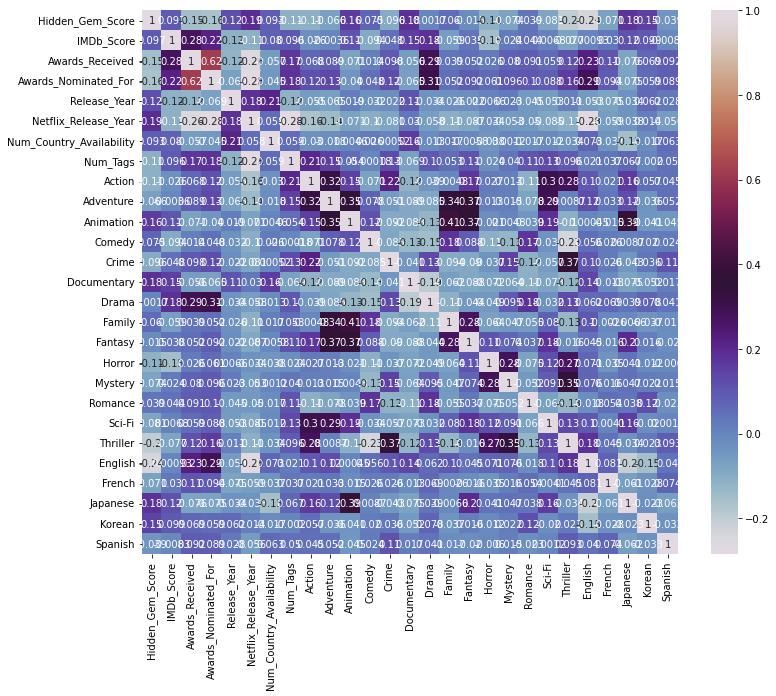

In [353]:
# Plotting a correlation matrix
plt.figure(figsize = (12,10))
c = train_processed.corr()
sns.heatmap(c, annot = True, cmap = 'twilight')

타겟 특성: 'Hidden Gem Score'  
- 8점 이상: 1
- 8점 미만은: 0

In [354]:
target = 'Hidden_Gem_Score'

In [21]:
# sns.countplot(x='Hidden_Gem_Score',data = train)

In [355]:
def analysis_on_target(df):

    n_zero_label, n_one_label = -1, -1

    n_zero_label = len(df.loc[df['Hidden_Gem_Score'] == 0])
    n_one_label = len(df.loc[df['Hidden_Gem_Score'] == 1])

    plt.pie(
        (n_zero_label, n_one_label),
        labels=(0, 1),
        autopct="%.1f%%",
        shadow=True,
        startangle=90,
    )
    plt.title("Target: Hidden Gem Score", size=15)
    plt.show()

    return n_zero_label, n_one_label

### 전처리 후 타겟 분포

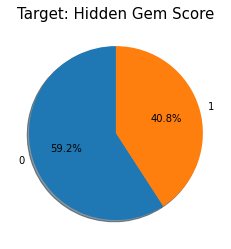

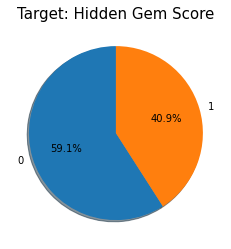

(1829, 1267)

In [356]:
# 전처리 후 타겟 분포 확인
analysis_on_target(train_processed)
analysis_on_target(test_processed)

### 이진 피처 분포

In [357]:
# 비율 표시 함수
def write_percent(ax, total_size): # 도형 객체를 순회하며 막대 상단에 타겟값 비율 표시
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이 (데이터 개수)
        width = patch.get_width()
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 X축 위치
        percent = height/total_size*100 # 타겟값 비율

        # (x, y) 좌표에 텍스트 입력
        ax.text(x = left_coord + width/2.0, # x축 위치
                y = height + total_size*0.001,  # y축 위치
                s = f'{percent:1.1f}%', # 입력 테스트
                ha = 'center')  # 가운데 정렬

#### Awards

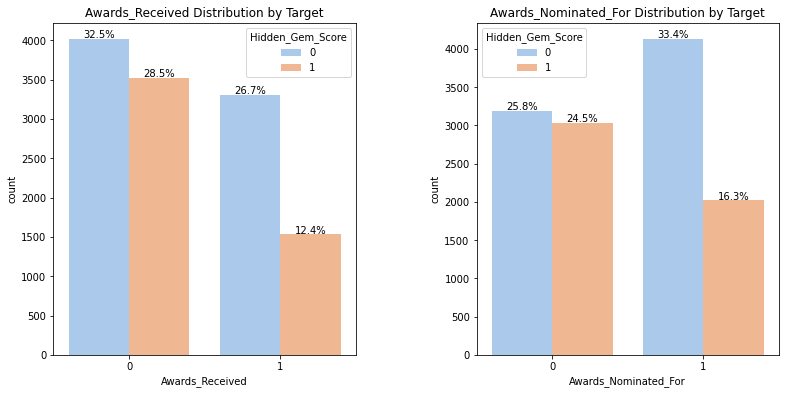

In [358]:
import matplotlib as mpl
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열 틀 (Figure) 준비
mpl.rc('font', size = 10)
grid = gridspec.GridSpec(3,2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize = (13, 22)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace = 0.4, hspace = 0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['Awards_Received', 'Awards_Nominated_For'] # 피쳐 목록
target = 'Hidden_Gem_Score'

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])

    # ax축에 타겟값 분포 카운트플롯 그리기
    sns.countplot(x = feature,
                  data = train_processed,
                  hue = target,
                  palette = 'pastel',
                  ax = ax)
    
    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train_processed))

#### Languages

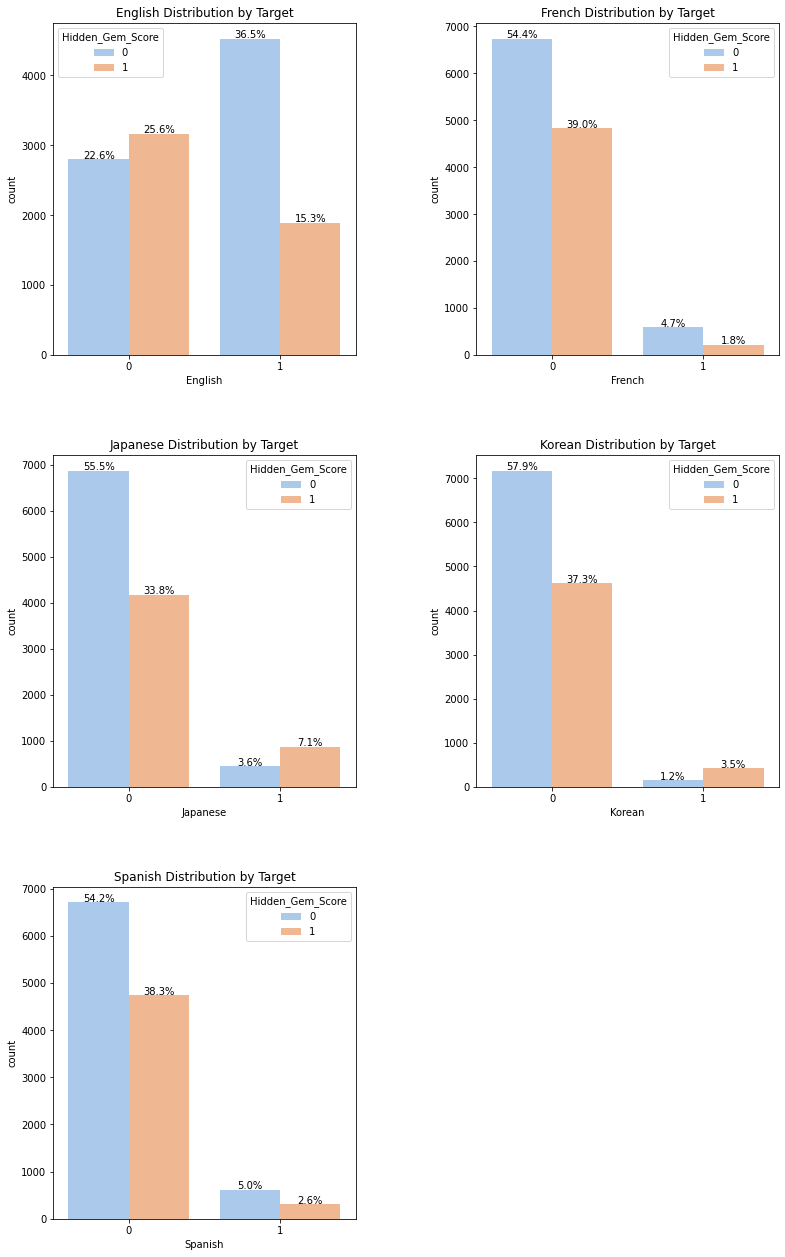

In [359]:
# 3행 2열 틀 (Figure) 준비
mpl.rc('font', size = 10)
grid = gridspec.GridSpec(3,2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize = (13, 22)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace = 0.4, hspace = 0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['English', 'French', 'Japanese', 'Korean', 'Spanish'] # 피쳐 목록
target = 'Hidden_Gem_Score'

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])

    # ax축에 타겟값 분포 카운트플롯 그리기
    sns.countplot(x = feature,
                  data = train_processed,
                  hue = target,
                  palette = 'pastel',
                  ax = ax)
    
    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train_processed))

#### Genre

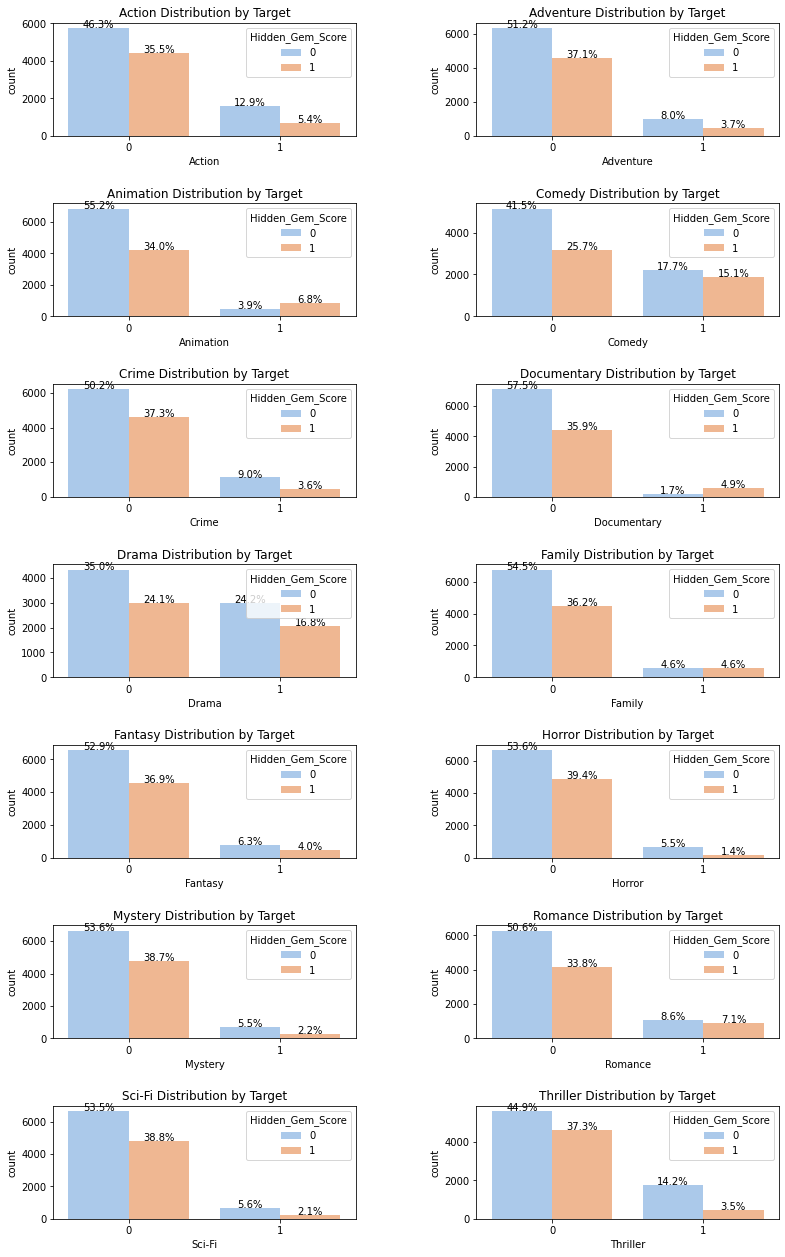

In [360]:
# 3행 2열 틀 (Figure) 준비
mpl.rc('font', size = 10)
grid = gridspec.GridSpec(7,2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize = (13, 22)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace = 0.4, hspace = 0.6) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror',
                'Mystery', 'Romance', 'Sci-Fi', 'Thriller'] # 피쳐 목록
target = 'Hidden_Gem_Score'

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])

    # ax축에 타겟값 분포 카운트플롯 그리기
    sns.countplot(x = feature,
                  data = train_processed,
                  hue = target,
                  palette = 'pastel',
                  ax = ax)
    
    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train_processed))

### 명목형/순서형 피처 분포

In [93]:
train_processed.columns 

Index(['Title', 'Series_or_Movie', 'Hidden_Gem_Score', 'Runtime', 'IMDb_Score',
       'Awards_Received', 'Awards_Nominated_For', 'Release_Year',
       'Netflix_Release_Year', 'Num_Country_Availability', 'Num_Tags',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'English', 'French', 'Japanese', 'Korean', 'Spanish'],
      dtype='object')

#### Runtime

#### Netflix_Release_Year

#### Release_Year

#### Series or Movie

#### Num_Tags

### Num_Country_Availability

#### IMDb_Score

In [361]:
# 교차분석표
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['Hidden_Gem_Score'], normalize = 'index')*100
    croostab = crosstab.reset_index()
    return crosstab

In [362]:
# point plot
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축 공유 하지 않는 새로운 축 생성

    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x = crosstab.index, y = 1, data = crosstab,
                        color = 'black',
                        order = crosstab.index.values, # 포인트플롯 순서                        
                        legend = False)
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')

In [363]:
# 피처 분포도 및 피처별 타겟값 1의 비율 포인트플롯 생성 함수

import matplotlib as mpl
import matplotlib.gridspec as gridspec

def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size = (15, 20)):
    plt.figure(figsize = size) # 전체 피규어 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace = 0.45, hspace = 0.3) # 서브프롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features): #
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성
 
        # ax축에 타겟값 분포 카운트플롯 그리기
        sns.countplot(x = feature, data = df,
                      color = 'skyblue',
                      order = crosstab.index.values, # 포인트플롯 순서                      
                      ax = ax)

        
        write_percent(ax, len(df)) # 비율 표시

        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기

        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

In [ ]:
#sns.histplot(data=train_processed, x='Series_or_Movie', hue = 'Hidden_Gem_Score')

In [364]:
# 순서형 피처 순서 지정
from pandas.api.types import CategoricalDtype

runtime_value = ['< 30 minutes', '30-60 mins', '1-2 hours', '> 2 hrs']

runtime_dtype = CategoricalDtype(categories = runtime_value, ordered=True)

train_processed['Runtime'] = train_processed['Runtime'].astype(runtime_dtype)

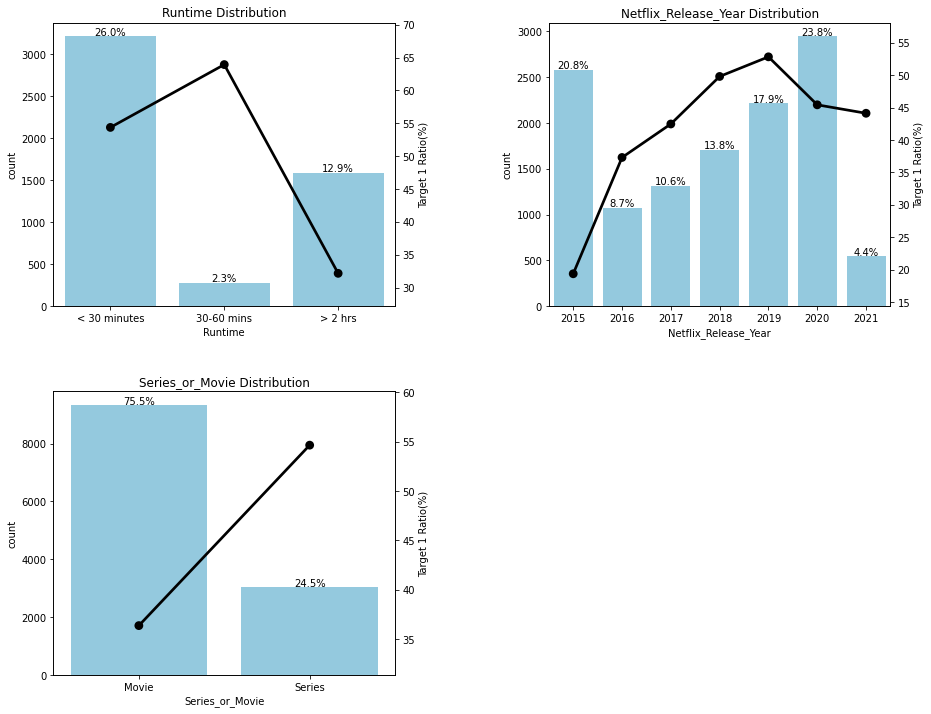

In [365]:
# 순서형 피처
ord_features = ['Runtime', 'Netflix_Release_Year', 'Series_or_Movie']
plot_cat_dist_with_true_ratio(train_processed, 
                              ord_features, 
                              num_rows = 2, num_cols = 2, size = (15, 12))


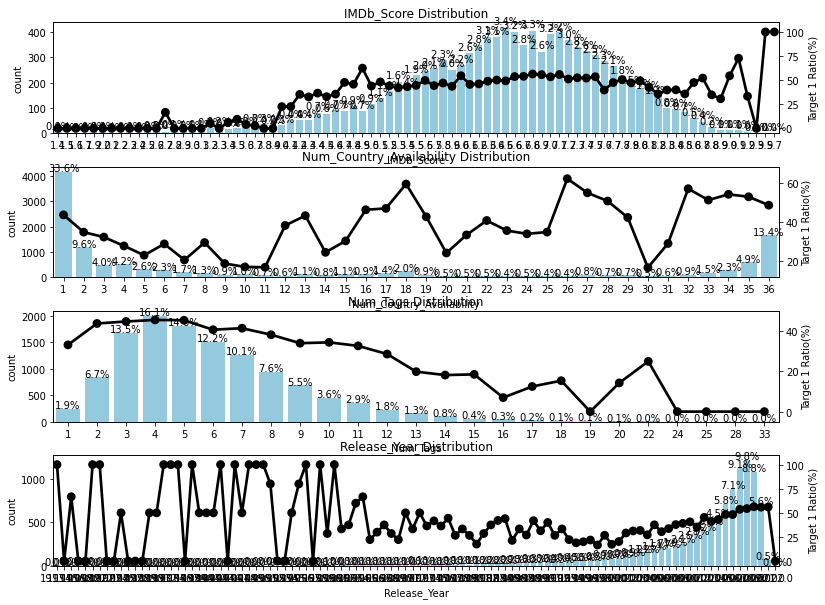

In [367]:
# 고윳값 개수 많은 피처
plot_cat_dist_with_true_ratio(train_processed, 
                              ['IMDb_Score', 'Num_Country_Availability', 'Num_Tags', 'Release_Year'], 
                              num_rows = 4, num_cols = 1, size = (13, 10))

### 기준모델

In [100]:
# 기준모델 (최빈값) 
from sklearn.metrics import accuracy_score

def getBaseModel(df): 
    y_base = train_processed['Hidden_Gem_Score'] 
    major = y_base.mode()[0] 
    y_pred = [major] * len(y_base) 
    accuracy = accuracy_score(y_base, y_pred) 

    return accuracy

print('기준모델 정확도: ',getBaseModel(df))

기준모델 정확도:  0.5915697674418605


# Part 2
1. 모델 학습 및 검증
2. 모델 해석


### 데이터 분할

In [25]:
### [1]: 모델 학습 및 검증

In [101]:
## 데이터를 feature (X), label(y)로 분할
def divide_data(df):

    target = 'Hidden_Gem_Score'
    X = df.drop(columns = target)
    y = df[target]

    return X, y

In [102]:
X_train, y_train = divide_data(train_processed)
X_test, y_test = divide_data(test_processed)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(12384, 29) (12384,) (3096, 29) (3096,)


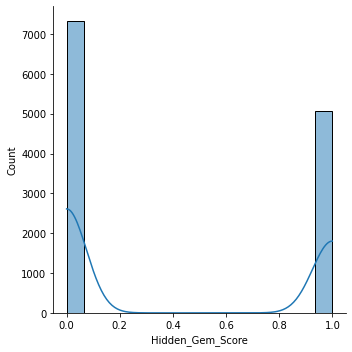

In [103]:
%matplotlib inline
import seaborn as sns
sns.displot(y_train, kde=True)

## 모델 학습

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import xgboost
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score

### 0.Logistic Regression

In [73]:
# 모델 학습 [0] Logistic Regression

def fit(X_train, y_train):
    
    pipeline0 = make_pipeline(
        OrdinalEncoder(), # 높은 cardinality를 가진 column에 유용한 Ordinal 인코딩 진행
        SimpleImputer(strategy = 'median'),
        LogisticRegression()
    )

    dists0 = {
        'logisticregression__C': [.01,.05,.1,.5,1,5,10],
        'logisticregression__penalty':['l1','l2']
    }

    clf0 = RandomizedSearchCV(
        pipeline0, 
        param_distributions = dists0, 
        random_state = 2, 
        n_iter = 50, 
        cv = 5, 
        verbose = 1, 
        n_jobs = -1)
    
    clf0.fit(X_train, y_train)
    print("Optimal Hyperparameter:", clf0.best_params_)
    print("f1 score:", clf0.best_score_)

    return clf0


def predict(X, y, best_estimator):
    
    #1일 확률 반환

    y_pred_proba = best_estimator.predict_proba(X)[:, 1]

    report = classification_report(y, y_pred_proba > 0.5)

    return y_pred_proba, report

In [74]:
clf0 = fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Optimal Hyperparameter: {'logisticregression__penalty': 'l2', 'logisticregression__C': 0.05}
f1 score: 0.6381642940578361


### 1.Random Forest

In [41]:
# 모델 학습 [1] Random Forest

def fit(X_train, y_train):
    
    pipeline1 = make_pipeline(
        OrdinalEncoder(), # 높은 cardinality를 가진 column에 유용한 Ordinal 인코딩 진행
        SimpleImputer(strategy = 'median'),
        RandomForestClassifier()
    )

    dists1 = {
        'randomforestclassifier__n_estimators' : randint(10, 1000),
        'randomforestclassifier__max_depth' : [5, 10, 15, 20, 25, 30],
        'randomforestclassifier__min_samples_leaf' : randint(10, 50),
        'randomforestclassifier__max_features' : ['sqrt', 'log2', None]
    }

    clf1 = RandomizedSearchCV(
        pipeline1,
        param_distributions = dists1,
        n_iter = 50,
        cv = 5,
        scoring = 'f1',
        verbose = 1,
        n_jobs = -1,
        random_state = 2,
    )

    clf1.fit(X_train, y_train)
    print("Optimal Hyperparameter:", clf1.best_params_)
    print("f1 score:", clf1.best_score_)

    return clf1


def predict(X, y, best_estimator):
    
    #1일 확률 반환

    y_pred_proba = best_estimator.predict_proba(X)[:, 1]

    report = classification_report(y, y_pred_proba > 0.5)

    return y_pred_proba, report

In [42]:
clf1 = fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Optimal Hyperparameter: {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 13, 'randomforestclassifier__n_estimators': 335}
f1 score: 0.7950549965847663


### 2.XGBoost

In [106]:
# 모델 학습 [2] XGBClassifier
def fit(X_train, y_train):
    
    pipeline2 = make_pipeline(
        OrdinalEncoder(),
        SimpleImputer(strategy='median'),
        XGBClassifier(),
    )

    dists2 = {
        'xgbclassifier__n_estimators' : randint(10, 1000),
        'xgbclassifier__max_depth' : [5, 10, 15, 20, 25, 30],
        'xgbclassifier__min_child_weight' : [1, 3, 5, 7 ],
        'xgbclassifier__gamma' : [0.1, 0.2 , 0.3, 0.4 ],
        'xgbclassifier__learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30]
    }

    clf2 = RandomizedSearchCV(
        pipeline2,
        param_distributions = dists2,
        n_iter = 50,
        cv = 5,
        scoring = 'f1',
        verbose = 1,
        n_jobs = -1,
        random_state = 2
    )

    clf2.fit(X_train, y_train)
    print("Optimal Hyperparameter:", clf2.best_params_)
    print("f1score:", clf2.best_score_)

    return clf2


def predict(X, y, best_estimator):
    
    #1일 확률 반환

    y_pred_proba = best_estimator.predict_proba(X)[:, 1]

    report = classification_report(y, y_pred_proba > 0.5)

    return y_pred_proba, report

In [107]:
clf2 = fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Optimal Hyperparameter: {'xgbclassifier__gamma': 0.2, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 20, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__n_estimators': 98}
f1score: 0.8063314673031161


#### Test Score

In [108]:
# accuracy, f1 score
def get_clf_eval(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    print('정확도:{},\nf1 score:{}'.format(accuracy, f1))

In [109]:
pred = clf2.best_estimator_.predict(X_test)
get_clf_eval(y_test, pred)

정확도:0.8414082687338501,
f1 score:0.8169959001118151


In [ ]:
# # test score 확인 (AUC)
# from sklearn.metrics import roc_curve, roc_auc_score

# def plot_roc(y, y_pred_proba):
#     auc_score = roc_auc_score(y, y_pred_proba)
#     fpr, tpr, _ = roc_curve(y, y_pred_proba)
#     baseline_fpr, baseline_tpr, _ = roc_curve(y, [0] * len(y)) # baseline

#     plt.style.use("ggplot")
#     plt.plot(fpr, tpr, label="Model")
#     plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
#     plt.xlabel("False Positive Rate", size=12)
#     plt.ylabel("True Positive Rate", size=12)
#     plt.title("Receiver Operating Characteristic")
#     plt.legend(prop={"size": 12})
#     plt.show()
#     return auc_score


# y_test_pred_proba, report = predict(X_test, y_test, clf2.best_estimator_)
# print(report)
# auc_score = plot_roc(y_test, y_test_pred_proba)

## 모델 해석

In [33]:
### [2]: 모델 해석

In [115]:
# pipeline을 preprocess_pipeline과 model로 나누기
pipeline = clf2.best_estimator_

preprocess_pipeline = make_pipeline(pipeline.named_steps['ordinalencoder'], 
                                      pipeline.named_steps['simpleimputer'] ) 

model = pipeline.named_steps['xgbclassifier']

# X_test을 preprocess_pipeline에 통과시켜 X_test_preprocessed를 만들기
# preprocess_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocess_pipeline.transform(X_test)

In [64]:
# # pipeline을 preprocess_pipeline과 model로 나누기
# pipeline = clf2.best_estimator_

# preprocess_pipeline = make_pipeline(
#     OrdinalEncoder(), 
#     SimpleImputer(strategy = 'median')
# )

# model = pipeline.named_steps['xgbclassifier']

# # X_test을 preprocess_pipeline에 통과시켜 X_test_preprocessed를 만들기
# # preprocess_pipeline.fit_transform(X_train)
# # X_test_preprocessed = preprocess_pipeline.transform(X_test)

### Confusion Matrix

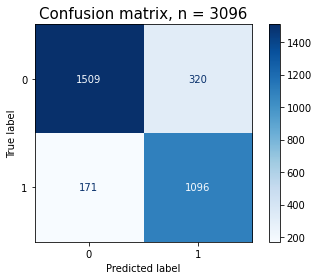

In [113]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipeline, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

### 특성 중요도

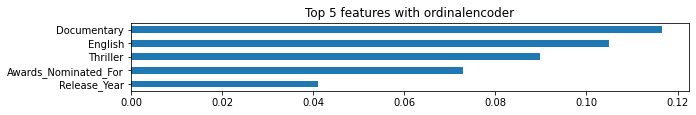

In [114]:
xgb_ord = pipeline.named_steps['xgbclassifier']
importances_ord = pd.Series(xgb_ord.feature_importances_, X_train.columns)

n = 5
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with ordinalencoder')
importances_ord.sort_values()[-n:].plot.barh();


### Permutation Importance

In [116]:
# Permutation Importance 계산
import eli5
from eli5.sklearn import PermutationImportance


def get_permutation_importance(X, y, model):
    permuter = PermutationImportance(
        model,
        scoring = 'roc_auc', 
        n_iter = 5,
        random_state =42
    )
    
    permuter.fit(X, y)

    return permuter

In [37]:
# permuter = PermutationImportance(
#     model,
#     scoring = 'roc_auc', # accuracy 
#     n_iter = 5,
#     random_state =42
# )
    
# permuter.fit(X_val_preprocessed, y_val)

In [117]:
permuter = get_permutation_importance(X_test_preprocessed, y_test, model)
eli5.show_weights(permuter, top=None, feature_names=X_test.columns.tolist())
print("Top3 Important Features:")
p_i = sorted(
    list(zip(X_test.columns.tolist(), permuter.feature_importances_)),
    key=lambda x: x[1],
    reverse=True,
)
print(p_i[:3])

Top3 Important Features:
[('IMDb_Score', 0.19981940524126132), ('English', 0.0687991376330566), ('Awards_Nominated_For', 0.025640701441262757)]


In [118]:
# 특성별 score 확인
feature_names = X_test.columns.tolist()

eli5.show_weights(
    permuter, 
    top = None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names = feature_names 
)

Weight,Feature
0.1998 ± 0.0115,IMDb_Score
0.0688 ± 0.0028,English
0.0256 ± 0.0049,Awards_Nominated_For
0.0153 ± 0.0048,Netflix_Release_Year
0.0137 ± 0.0022,Thriller
0.0121 ± 0.0027,Release_Year
0.0102 ± 0.0018,Num_Country_Availability
0.0087 ± 0.0019,Awards_Received
0.0072 ± 0.0008,Animation
0.0067 ± 0.0012,Documentary


### PDP

In [119]:
# PDP Plot (1 변수: IMDb_Score)
from pdpbox.pdp import pdp_isolate, pdp_plot

def get_pdp_isolated(dataset, model, feature):

    pdp_isolated = pdp_isolate(
        model = model,
        dataset = dataset,
        model_features = dataset.columns,
        feature = feature,
        grid_type = 'percentile', # default='percentile', or 'equal'
        num_grid_points=10 # default=10
    )

    return pdp_isolated

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f2cabf03ad0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f2cabf28410>})

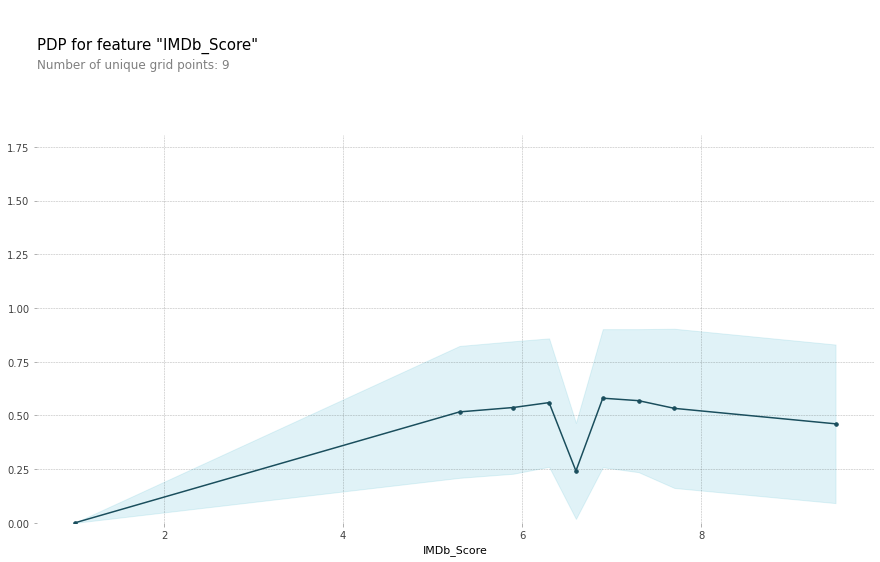

In [121]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=X_test.columns)
feature = sorted(p_i, key=lambda x: x[1], reverse=True)[0][0]
pdp_isolated = get_pdp_isolated(X_test_preprocessed_df, pipeline, feature)
pdp_plot(pdp_isolated, feature_name=feature)

#### 한계점

In [128]:
X_train['IMDb_Score'].mean()

6.496032116515727

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feb83cbd910>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feb83cbd2d0>})

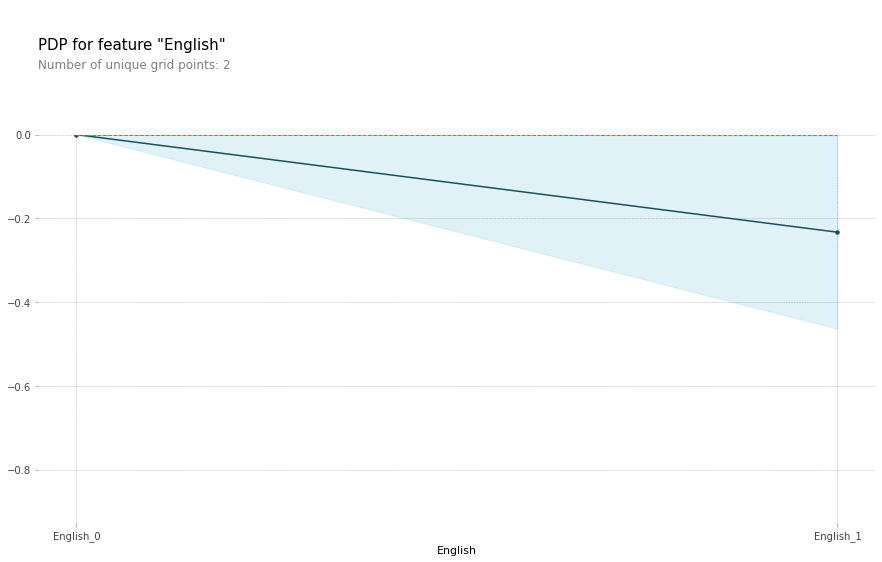

In [100]:
# PDP Plot (1 변수: English)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=X_test.columns)
feature = sorted(p_i, key=lambda x: x[1], reverse=True)[1][0]
pdp_isolated = get_pdp_isolated(X_test_preprocessed_df, pipeline, feature)
pdp_plot(pdp_isolated, feature_name=feature)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feb81dea4d0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feb81deaed0>})

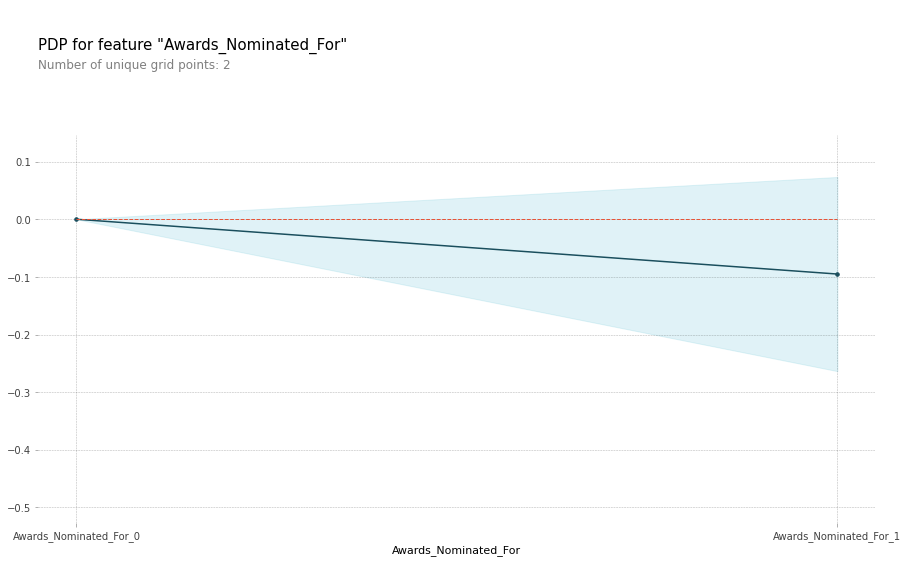

In [101]:
# PDP Plot (1 변수: Awards_Nominated_For)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=X_test.columns)
feature = sorted(p_i, key=lambda x: x[1], reverse=True)[2][0]
pdp_isolated = get_pdp_isolated(X_test_preprocessed_df, pipeline, feature)
pdp_plot(pdp_isolated, feature_name=feature)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feb83b67d90>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feb83d32510>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


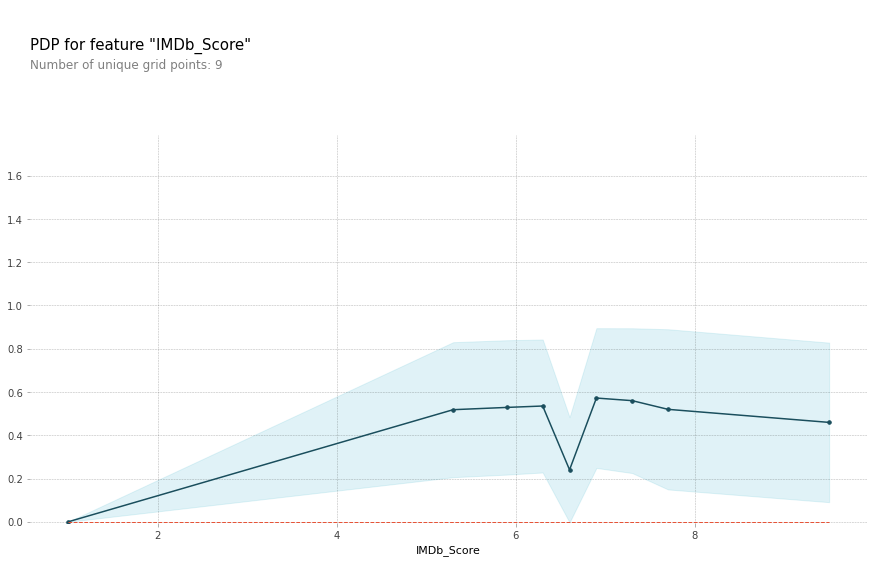

In [122]:
# PDP Plot (2 변수)
from pdpbox.pdp import pdp_interact, pdp_interact_plot


def get_pdp_interaction(dataset, model, features):
    
    pdp_interaction = pdp_interact(
        model = model,
        dataset = dataset,
        model_features = dataset.columns,
        features = features
    )

    return pdp_interaction

(<Figure size 540x684 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f2cabd62510>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f2cabddadd0>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


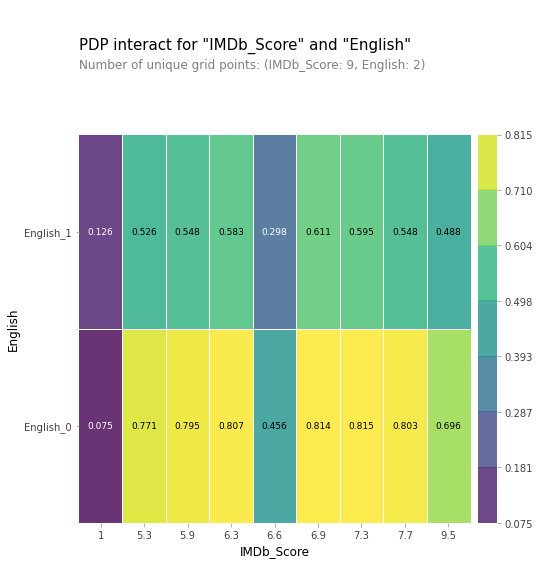

In [123]:
features = list(map(lambda x: x[0], sorted(p_i, key=lambda x: x[1], reverse=True)))[:2]
pdp_interaction = get_pdp_interaction(X_test_preprocessed_df, pipeline, features)
pdp_interact_plot(pdp_interaction, feature_names=features, plot_type="grid")

### Shap

In [124]:
# 클래스의 비율
y_train.value_counts(normalize=True)

0    0.59157
1    0.40843
Name: Hidden_Gem_Score, dtype: float64

In [125]:
ratio = 0.41/0.59

In [115]:
# from sklearn.metrics import roc_auc_score

# class_index = 1
# y_pred_proba = model.predict_proba(X_test_preprocessed)[:, class_index]
# print(f'Test AUC for class "{model.classes_[class_index]}":')
# print(roc_auc_score(y_test, y_pred_proba)) # 범위는 0-1, 수치는 높을 수록 좋습니다


Test AUC for class "1":
0.9375055829024879


In [126]:
# Confution matrix 확인
from sklearn.metrics import classification_report

y_test_pred = model.predict(X_test_preprocessed)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1829
           1       0.77      0.87      0.82      1267

    accuracy                           0.84      3096
   macro avg       0.84      0.85      0.84      3096
weighted avg       0.85      0.84      0.84      3096



In [127]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_preprocessed_df.iloc[:100])

### 예측을 SHAP그래프를 통해 설명하는 함수

In [315]:
# 예측을 SHAP그래프를 통해 설명하는 함수
def explain(row_number):
    positive_class = 'True_Hidden_Gem'
    positive_class_index = 1

    # row 값을 변환합니다
    row = X_test.iloc[[row_number]]
    row_preprocessed = preprocess_pipeline.transform(row)

    # 예측하고 예측확률을 얻습니다 
    pred = model.predict(row_preprocessed)[0]
    pred_proba = model.predict_proba(row_preprocessed)[0, positive_class_index]
    pred_proba *= 100
    if pred != positive_class:
        pred_proba = 100 - pred_proba

    # 예측결과와 확률값을 얻습니다
    print(f'이 컨텐츠에 대한 예측결과는 {pred} 으로, 확률은 {pred_proba:.0f}% 입니다.')
    
    # SHAP를 추가합니다
    shap_values = explainer.shap_values(row_preprocessed)

    # Fully Paid에 대한 top 3 pros, cons를 얻습니다
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index

    # 예측에 가장 영향을 준 top3
    print('\n')
    print('Positive 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # 예측에 가장 반대적인 영향을 준 요인 top1
    print('\n')
    print('Negative 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = cons if pred == positive_class else pros
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # SHAP
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row, 
        link='logit'
    )

In [338]:
explain(321)

이 컨텐츠에 대한 예측결과는 0 으로, 확률은 94% 입니다.


Positive 영향을 가장 많이 주는 3가지 요인 입니다:
1. IMDb_Score : 3.2
2. English : 1
3. Comedy : 1


Negative 영향을 가장 많이 주는 3가지 요인 입니다:
1. Runtime : 1-2 hour
2. Netflix_Release_Year : 2020
3. Release_Year : 2007.0


In [337]:
explain(1234)

이 컨텐츠에 대한 예측결과는 1 으로, 확률은 49% 입니다.


Positive 영향을 가장 많이 주는 3가지 요인 입니다:
1. English : 1
2. Fantasy : 1
3. Release_Year : 2003.0


Negative 영향을 가장 많이 주는 3가지 요인 입니다:
1. Runtime : 1-2 hour
2. Awards_Nominated_For : 0
3. IMDb_Score : 6.1


In [330]:
explain(310)

이 컨텐츠에 대한 예측결과는 1 으로, 확률은 46% 입니다.


Positive 영향을 가장 많이 주는 3가지 요인 입니다:
1. English : 1
2. IMDb_Score : 4.5
3. Drama : 1


Negative 영향을 가장 많이 주는 3가지 요인 입니다:
1. Runtime : 1-2 hour
2. Awards_Nominated_For : 0
3. Release_Year : 2019.0


In [329]:
explain(960)

이 컨텐츠에 대한 예측결과는 1 으로, 확률은 49% 입니다.


Positive 영향을 가장 많이 주는 3가지 요인 입니다:
1. English : 1
2. Awards_Nominated_For : 1
3. IMDb_Score : 8.2


Negative 영향을 가장 많이 주는 3가지 요인 입니다:
1. Animation : 1
2. Awards_Received : 0
3. Runtime : 1-2 hour


In [317]:
explain(12)

이 컨텐츠에 대한 예측결과는 0 으로, 확률은 84% 입니다.


Positive 영향을 가장 많이 주는 3가지 요인 입니다:
1. Thriller : 1
2. English : 1
3. Num_Country_Availability : 36


Negative 영향을 가장 많이 주는 3가지 요인 입니다:
1. Runtime : 1-2 hour
2. Awards_Nominated_For : 0
3. Awards_Received : 0


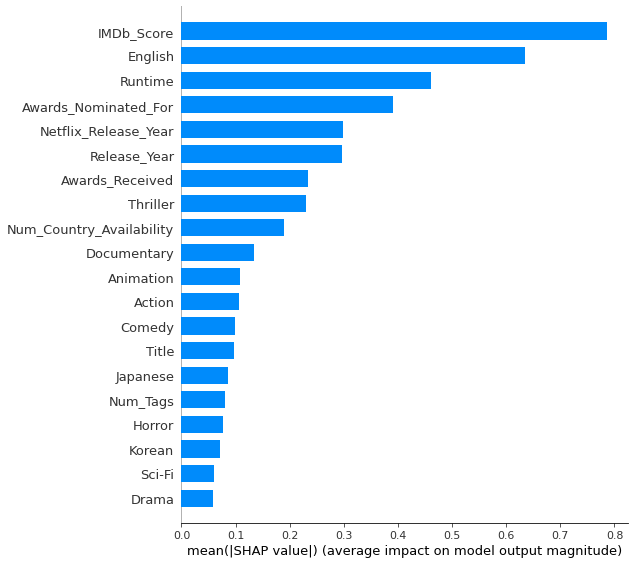

In [318]:
shap.summary_plot(shap_values, X_test_preprocessed_df.iloc[:300], plot_type="bar")

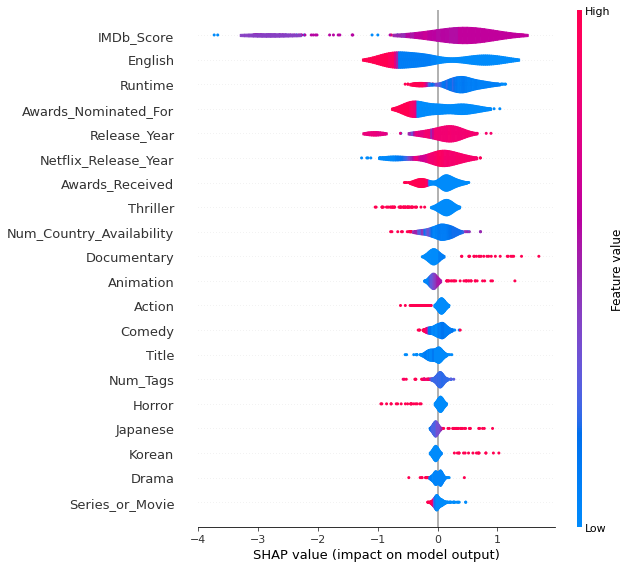

In [319]:
shap_values = explainer.shap_values(X_test_preprocessed_df.iloc[:300])

shap.summary_plot(shap_values, X_test_preprocessed_df.iloc[:300], plot_type="violin")

# 메모장

In [ ]:
- 캐글에서 가장 인기 있는 머신러닝 모델: XGBoost, LightGBM

- 로지스틱 회귀 모델: 선형 회귀 방식을 응용해 분류에 적용한 모델.
note: 이름의 '회귀'때문에 회귀 문제에 사용할 것 같지만, 분류 문제에 사용한다.
    - LogisticRegression
    - predict(): 타깃값 예측
    - predict_proba(): 타깃값일 확률 예측

- 우리는 제품을 구매할 때 다양한 후기를 보며 살지 말지를 정합니다.
문제를 풀 때도 판 명이 푸는 것보다 여러 명이 풀어서 서로 비교해보는 게 낫습니다.
전문가 한 명의 의견보다 여러 명의 종합 의견이 더 정확할 가능성이 큽니다. 
머신러닝에서도 마찬가지이며, 다양한 모델이 내린 예측 결과를 결합하는 기법을 '앙상블 학습'이라고 합니다.

- 앙상블 학습을 활용하면 대체로 예측 성능이 좋아집니다. 과대적합 방지 효과도 있고요. 그래서 캐글러들은 앙상블 기법을 많이 활용합니다.

- 학습 유형으로 배깅, 부스팅 등이 있습니다.
- 배깅: 개별 모델로 예측한 결과를 결합해 최종 예측을 정하는 기법
    특징: 개별 모델이 서로 다른 샘플링 데이터를 활용' (결정 트리가 독립적)
    (배깅 기법을 활용한) 대표적인 모델: 랜덤 포레스트

- 부스팅: 가중치를 활용해 분류 성능이 약한 모델을 강하게 만드는 기법
    특징: 모델 간 협력 (이전 모델이 잘못 예측한 데이터에 가중치 부여, 가중치 부여된 데이터를 집중 훈련)
    (부스팅 기법을 활용한) 대표적인 모델: XGBoost, LightGBM (성능 비슷하지만 LightGBM이 훈련 속도가 더 빠름)


